In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Question 1

In [2]:
pca_file = open("genotypes.eigenvec")
allele_freqs_file = open("genotypes.frq")

pca_eigenvecs = {}
allele_freqs = []

for line in pca_file:
    fields = line.split()
    ID = ("{}_{}").format(fields[0], fields[1])
    pca_eigenvecs[ID] = []
    
    for field in fields[2:]:
        pca_eigenvecs[ID].append(float(field))

for line in allele_freqs_file:
    if "MAF" in line:
        continue
        
    fields = line.split()
    allele_freq = float(fields[4])
    
    allele_freqs.append(allele_freq)

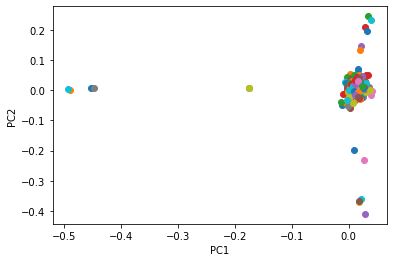

In [3]:
fig, ax = plt.subplots()

for ID, eigenvec in pca_eigenvecs.items():
    x = eigenvec[0]
    y = eigenvec[1]
    ax.scatter(x, y, label = ID)

ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
plt.show()

# Question 2

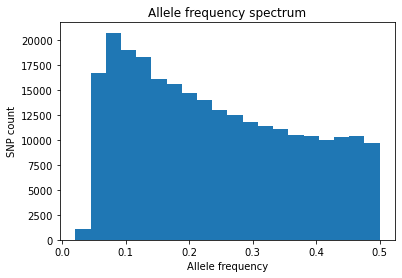

In [4]:
fig, ax = plt.subplots()

ax.hist(allele_freqs, bins = 20)

ax.set_title("Allele frequency spectrum")
ax.set_xlabel("Allele frequency")
ax.set_ylabel("SNP count")

plt.show()

# Question 4

In [5]:
CB1908_IC50_file = open("CB1908_IC50.qassoc")
GS451_IC50_file = open("GS451_IC50.qassoc")

CB1908_IC50 = []
GS451_IC50 = []

for line in CB1908_IC50_file:
    if "CHR" in line:
        continue
    
    fields = line.split()
    SNP_name = fields[1]
    bp = int(fields[2])
    p = float(fields[8])
    
    CB1908_IC50.append((SNP_name, bp, p))

for line in GS451_IC50_file:
    if "CHR" in line:
        continue
    
    fields = line.split()
    SNP_name = fields[1]
    bp = int(fields[2])
    p = float(fields[8])
    
    GS451_IC50.append((SNP_name, bp, p))

In [6]:
x = []
y = []

xsig = []
ysig = []

SNP_assoc_CB1908_IC50 = []

for SNP in CB1908_IC50:
    SNP_name = SNP[0]
    bp = SNP[1]
    logp = -np.log10(SNP[2])
    
    if logp > 5:
        xsig.append(bp)
        ysig.append(logp)
        SNP_assoc_CB1908_IC50.append((SNP_name, logp))
    else:
        x.append(bp)
        y.append(logp)

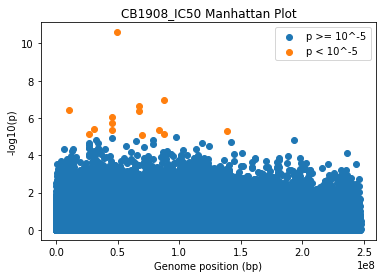

In [7]:
fig, ax = plt.subplots()

ax.scatter(x, y, label = "p >= 10^-5")
ax.scatter(xsig, ysig, label = "p < 10^-5")

ax.set_title("CB1908_IC50 Manhattan Plot")
ax.set_xlabel("Genome position (bp)")
ax.set_ylabel("-log10(p)")
ax.legend()

plt.show()

In [8]:
SNP_assoc_CB1908_IC50

[('rs4655937', 5.142366014849992),
 ('rs1848390', 6.980883709552927),
 ('rs2158721', 6.434388275097941),
 ('rs6577792', 5.3252306859845735),
 ('rs947721', 5.1213633269734835),
 ('rs1329196', 5.370488465799546),
 ('rs3781849', 5.3959900675877694),
 ('rs2522276', 5.730020323354676),
 ('rs2711728', 6.049099910633613),
 ('rs10881025', 5.351542405717478),
 ('rs10876043', 10.598944274228156),
 ('rs13313364', 5.0756690152913215),
 ('rs1942161', 6.6356366453842694),
 ('rs2032212', 6.3735569746687055)]

In [9]:
x = []
y = []

xsig = []
ysig = []

SNP_assoc_GS451_IC50 = []

for SNP in GS451_IC50:
    SNP_name = SNP[0]
    bp = SNP[1]
    logp = -np.log10(SNP[2])
    
    if logp > 5:
        xsig.append(bp)
        ysig.append(logp)
        SNP_assoc_GS451_IC50.append((SNP_name, logp))
    else:
        x.append(bp)
        y.append(logp)

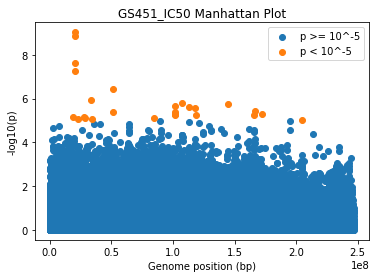

In [10]:
fig, ax = plt.subplots()

ax.scatter(x, y, label = "p >= 10^-5")
ax.scatter(xsig, ysig, label = "p < 10^-5")

ax.set_title("GS451_IC50 Manhattan Plot")
ax.set_xlabel("Genome position (bp)")
ax.set_ylabel("-log10(p)")
ax.legend()

plt.show()

In [11]:
SNP_assoc_GS451_IC50

[('rs7547739', 5.440093374963888),
 ('rs17046753', 5.0286777547571875),
 ('rs2698032', 5.367643953760926),
 ('rs1358578', 6.447210149807218),
 ('rs10170982', 5.675717544702307),
 ('rs10186803', 5.2876870913186345),
 ('rs12622974', 5.305307073668516),
 ('rs17025871', 5.407823242604133),
 ('rs13394005', 5.247721014539882),
 ('rs1582657', 5.815308569182402),
 ('rs1907642', 5.636200054520891),
 ('rs12489391', 5.249414472658991),
 ('rs6794084', 5.27099729072781),
 ('rs6798337', 5.31140222491883),
 ('rs1562152', 5.768530409569319),
 ('rs1931229', 5.553307533628473),
 ('rs7046031', 5.066765871285192),
 ('rs11024956', 5.136142038116027),
 ('rs3121758', 5.109914473283674),
 ('rs4343244', 5.1258081953209285),
 ('rs3094508', 5.93704216591549),
 ('rs1593578', 5.050122295963125),
 ('rs12972967', 7.239577516576788),
 ('rs10413538', 8.855425792390383),
 ('rs7257475', 9.031003673351687),
 ('rs2826383', 7.621238824683627),
 ('rs1041820', 5.146727775979317)]

In [12]:
obs_pvals = []
theor_pvals = []

for SNP in CB1908_IC50:
    obs_p = -np.log10(SNP[2])
    theor_p = -np.log10(np.random.random_sample())
    
    obs_pvals.append(obs_p)
    theor_pvals.append(theor_p)
    
obs_pvals.sort()
theor_pvals.sort()

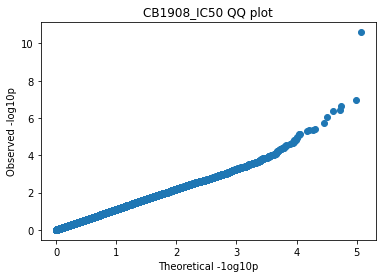

In [13]:
fig, ax = plt.subplots()
ax.scatter(theor_pvals, obs_pvals)

ax.set_title("CB1908_IC50 QQ plot")
ax.set_xlabel("Theoretical -1og10p")
ax.set_ylabel("Observed -log10p")

plt.show()

In [14]:
obs_pvals = []
theor_pvals = []

for SNP in GS451_IC50:
    obs_p = -np.log10(SNP[2])
    theor_p = -np.log10(np.random.random_sample())
    
    obs_pvals.append(obs_p)
    theor_pvals.append(theor_p)
    
obs_pvals.sort()
theor_pvals.sort()

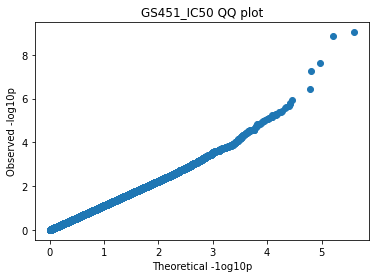

In [15]:
fig, ax = plt.subplots()
ax.scatter(theor_pvals, obs_pvals)

ax.set_title("GS451_IC50 QQ plot")
ax.set_xlabel("Theoretical -1og10p")
ax.set_ylabel("Observed -log10p")

plt.show()

# Question 5

Look at CB1908_IC50 stratified by rs10876043

In [19]:
vcf_file = open("genotypes.vcf")
phenotype_file = open("CB1908_IC50.txt")
ID_genotypes = {}
ID_phenotypes = {}

for line in vcf_file:
    if line.startswith("##"):
        continue
        
    fields = line.strip("\n").split("\t")
    
    if "#CHROM" in fields:
        IDs = fields[9:]
    
    if "rs10876043" in fields:
        genotypes = fields[9:]
        
for idx in range(len(IDs)):
    ID = IDs[idx]
    genotype = genotypes[idx]
    
    ID_genotypes[ID] = genotype
    
for line in phenotype_file:
    if line.startswith("FID"):
        continue
    
    fields = line.strip("\n").split("\t")
    ID = "{}_{}".format(fields[0], fields[1])
    
    if fields[2] == "NA":
        continue
    
    phenotype = float(fields[2])
    ID_phenotypes[ID] = phenotype


In [20]:
SNP2 = []
SNP1 = []
SNP0 = []

for ID, phenotype in ID_phenotypes.items():
    if ID_genotypes[ID] == "1/1":
        SNP2.append(phenotype)
    elif ID_genotypes[ID] == "0/1":
        SNP1.append(phenotype)
    else:
        SNP0.append(phenotype)

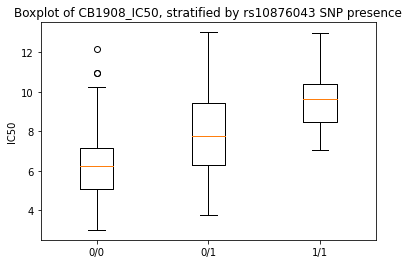

In [22]:
fig, ax = plt.subplots()

ax.boxplot([SNP0, SNP1, SNP2],
          positions = [1, 2, 3],
          labels = ["0/0", "0/1", "1/1"])
ax.set_title("Boxplot of CB1908_IC50, stratified by rs10876043 SNP presence")
ax.set_ylabel("IC50")
plt.show()